In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Conv2D, MaxPooling2D, UpSampling2D
from keras import optimizers
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1) / 255
x_test = x_test.reshape(10000, 28, 28 , 1) / 255

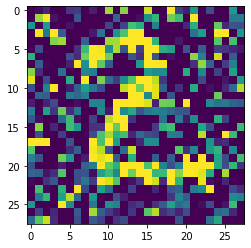

In [3]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

#Print one image to see the noise
plt.imshow(x_test_noisy[1].reshape(28, 28))

In [4]:
input_img = Input(shape=(28, 28, 1))
nn = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
nn = MaxPooling2D((2, 2), padding='same')(nn)
nn = Conv2D(32, (3, 3), activation='relu', padding='same')(nn)
encoded = MaxPooling2D((2, 2), padding='same')(nn)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [5]:
nn = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
nn = UpSampling2D((2, 2))(nn)
nn = Conv2D(32, (3, 3), activation='relu', padding='same')(nn)
nn = UpSampling2D((2, 2))(nn)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(nn)

In [6]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train,epochs=50,batch_size=256,validation_data=(x_test_noisy, x_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 91s 2ms/step - loss: 0.2236 - val_loss: 0.1461
Epoch 2/50
60000/60000 [==============================] - 90s 1ms/step - loss: 0.1340 - val_loss: 0.1306
Epoch 3/50
 1536/60000 [..............................] - ETA: 1:25 - loss: 0.1262

KeyboardInterrupt: 

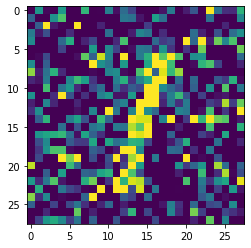

In [7]:
plt.imshow(x_test_noisy[5].reshape(28,28))

In [8]:
result = autoencoder.predict(x_test_noisy[5].reshape(1,28,28,1))

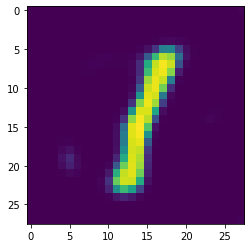

In [9]:
plt.imshow(result.reshape(28,28))